In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:

# Load the dataset
loan_data = pd.read_csv('/content/train.csv')

In [4]:
# Display first few rows of the dataset

loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# Display basic information about the dataset

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:

#Generates descriptive statistics for numerical columns in the dataset.
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# Check for missing values

loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [8]:
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')


loan_data['LoanAmount'] = num_imputer.fit_transform(loan_data[['LoanAmount']])
loan_data['Loan_Amount_Term'] = num_imputer.fit_transform(loan_data[['Loan_Amount_Term']])
loan_data['Credit_History'] = num_imputer.fit_transform(loan_data[['Credit_History']])

In [10]:

loan_data['Gender'] = cat_imputer.fit_transform(loan_data[['Gender']]).ravel()
loan_data['Married'] = cat_imputer.fit_transform(loan_data[['Married']]).ravel()
loan_data['Dependents'] = cat_imputer.fit_transform(loan_data[['Dependents']]).ravel()
loan_data['Self_Employed'] = cat_imputer.fit_transform(loan_data[['Self_Employed']]).ravel()

In [11]:
loan_data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


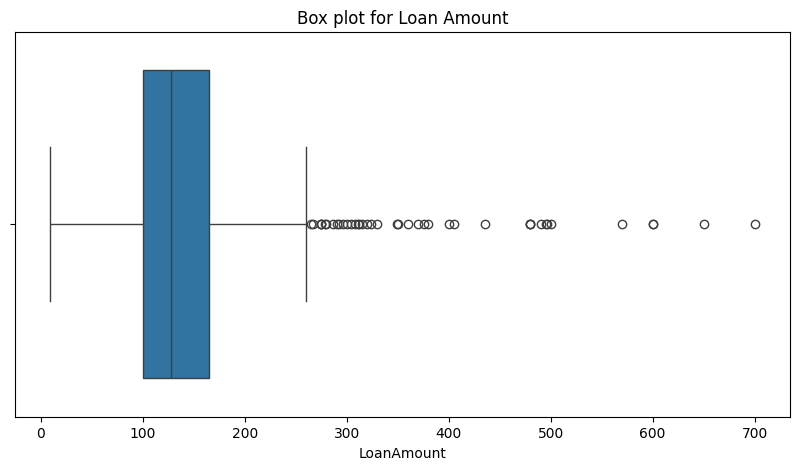

In [12]:
# Step 3: Outlier Detection and Handling
# Box plot for detecting outliers in 'LoanAmount'
plt.figure(figsize=(10, 5))
sns.boxplot(x=loan_data['LoanAmount'])
plt.title('Box plot for Loan Amount')
plt.show()

In [16]:

# Handle outliers (for example, using IQR method (Interquartile Range))
Q1 = loan_data['LoanAmount'].quantile(0.25)
Q3 = loan_data['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_low = Q1 - 1.5 * IQR
outlier_threshold_high = Q3 + 1.5 * IQR

In [17]:

# Filter out outliers
loan_data = loan_data[(loan_data['LoanAmount'] >= outlier_threshold_low) & (loan_data['LoanAmount'] <= outlier_threshold_high)]

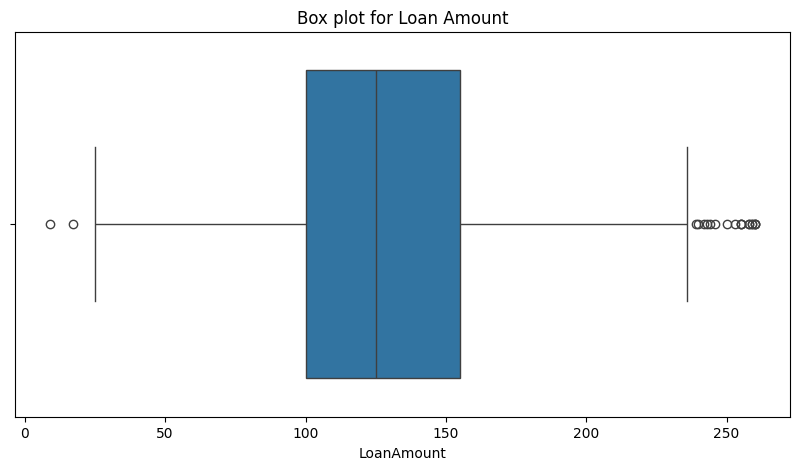

In [18]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=loan_data['LoanAmount'])
plt.title('Box plot for Loan Amount')
plt.show()

In [19]:
# Step 4: Encode Categorical Variables

# Identify categorical columns

categorical_cols = loan_data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    loan_data[col] = le.fit_transform(loan_data[col])
    label_encoders[col] = le

In [22]:

# Display first few rows after encoding

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [23]:

# Step 5: Feature Scaling
# Identify numerical columns
numerical_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [24]:

# Standard scaling for numerical features
scaler = StandardScaler()
loan_data[numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

In [25]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,-1.729031,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.328911,-0.630154,-0.010433,0.271476,0.414462,1.224522,0.665827
1,-1.722985,0.47918,0.740708,0.300727,-0.549793,-0.382099,-0.018351,0.012474,-0.010433,0.271476,0.414462,-1.326937,-1.501893
2,-1.716940,0.47918,0.740708,-0.718898,-0.549793,2.617120,-0.452565,-0.630154,-1.348463,0.271476,0.414462,1.224522,0.665827
3,-1.710894,0.47918,0.740708,-0.718898,1.818865,-0.382099,-0.566948,0.374698,-0.183082,0.271476,0.414462,1.224522,0.665827
4,-1.704848,0.47918,-1.350059,-0.718898,-0.549793,-0.382099,0.370330,-0.630154,0.270122,0.271476,0.414462,1.224522,0.665827


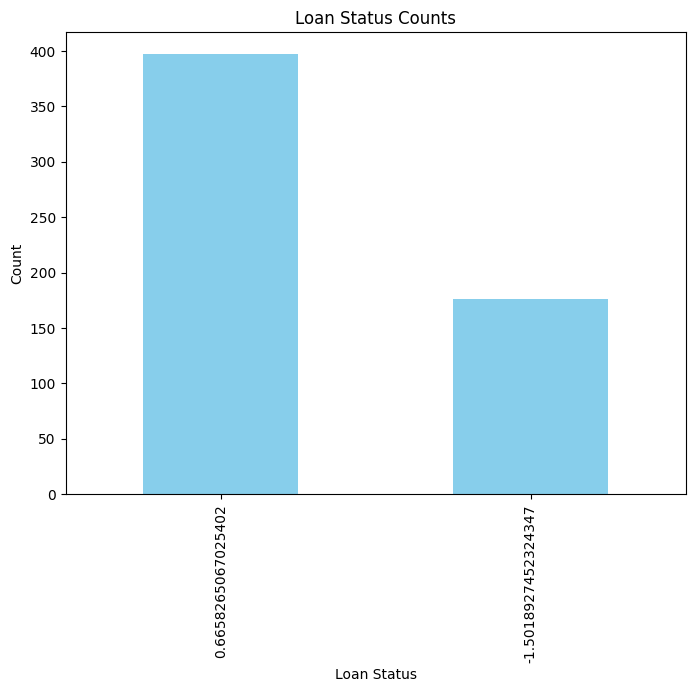

In [26]:
 #Bar plot for Loan Status
loan_status_counts = loan_data['Loan_Status'].value_counts()
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color='skyblue')
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


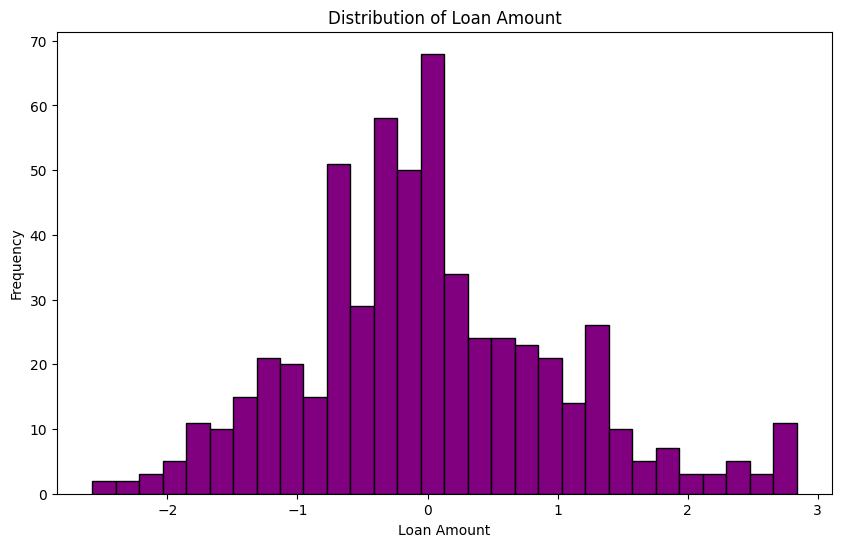

In [27]:
# Histogram for LoanAmount
plt.figure(figsize=(10, 6))
plt.hist(loan_data['LoanAmount'].dropna(), bins=30, color='purple', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

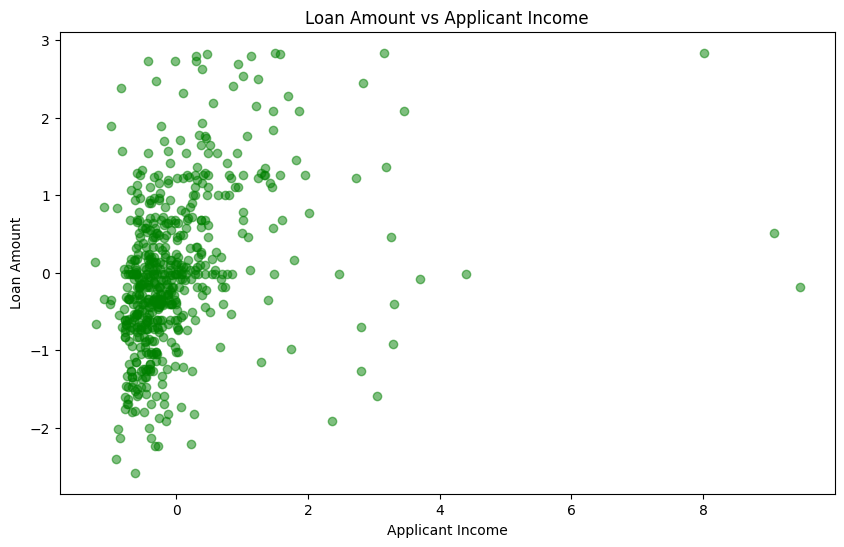

In [28]:

# Scatter plot for LoanAmount vs ApplicantIncome
plt.figure(figsize=(10, 6))
plt.scatter(loan_data['ApplicantIncome'], loan_data['LoanAmount'], color='green', alpha=0.5)
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<Figure size 1200x600 with 0 Axes>

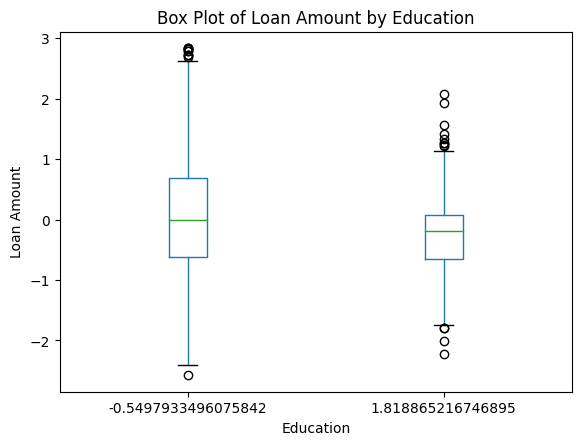

In [29]:

# Box plot for LoanAmount by Education
plt.figure(figsize=(12, 6))
loan_data.boxplot(column='LoanAmount', by='Education', grid=False)
plt.title('Box Plot of Loan Amount by Education')
plt.suptitle('')  # Suppress the automatic title to make the custom title stand out
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

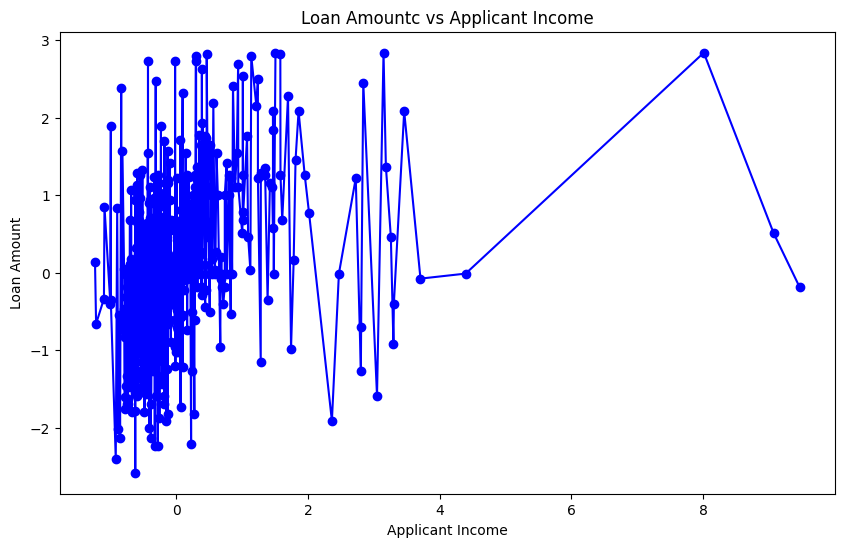

In [31]:
# Line plot for ApplicantIncome and LoanAmount (assuming the data is sorted)
sorted_loan_data = loan_data.sort_values(by='ApplicantIncome')
plt.figure(figsize=(10, 6))
plt.plot(sorted_loan_data['ApplicantIncome'], sorted_loan_data['LoanAmount'], marker='o', linestyle='-', color='blue')
plt.title('Loan Amountc vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-33-592a4e3d22ae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='LoanAmount', data=loan_data, palette='Set3')


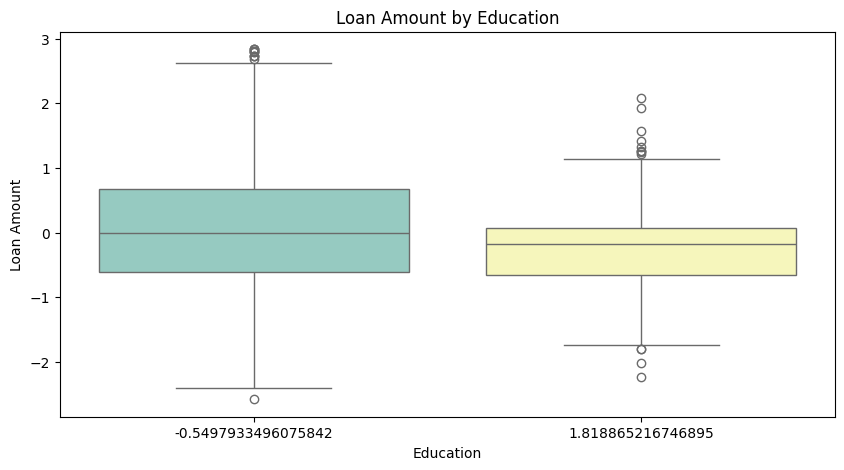

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='LoanAmount', data=loan_data, palette='Set3')
plt.title('Loan Amount by Education')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

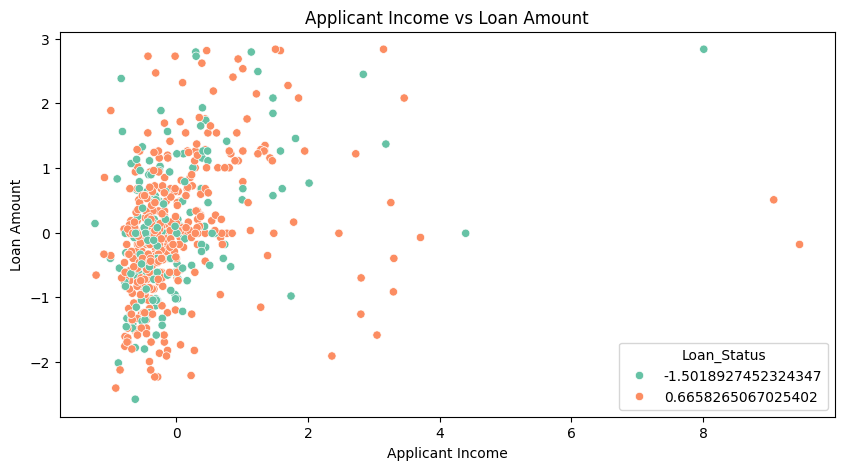

In [35]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=loan_data, hue='Loan_Status', palette='Set2')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [36]:
# Select only numeric columns for correlation matrix
numeric_loan_data = loan_data.select_dtypes(include=['number'])

# Fill NaN values with the mean of each column
numeric_loan_data = numeric_loan_data.fillna(numeric_loan_data.mean())

# Calculate the correlation matrix
correlation_matrix = numeric_loan_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show().

SyntaxError: invalid syntax (<ipython-input-36-c42805d84549>, line 14)

In [38]:
# Select only numeric columns for correlation matrix
numeric_loan_data = loan_data.select_dtypes(include=['number'])

In [40]:
# Fill NaN values with the mean of each column
numeric_loan_data = numeric_loan_data.fillna(numeric_loan_data.mean())

In [41]:

# Calculate the correlation matrix
correlation_matrix = numeric_loan_data.corr()

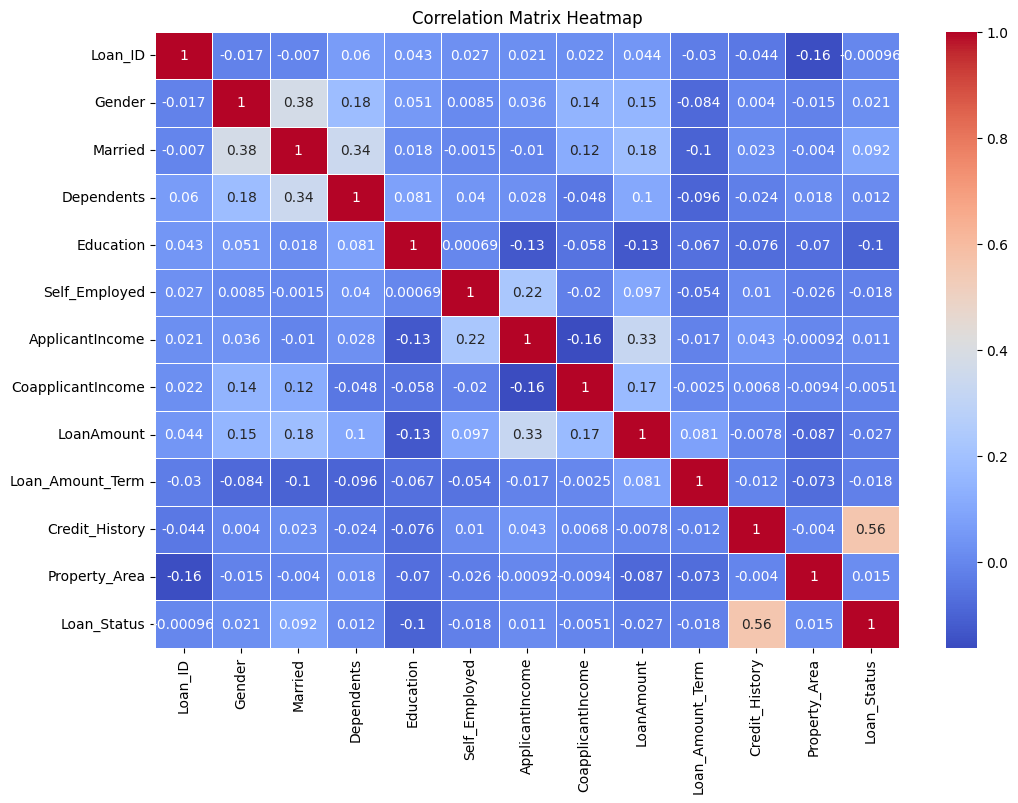

In [44]:
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-45-e5ac744e0c0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=loan_data, palette='Set3')


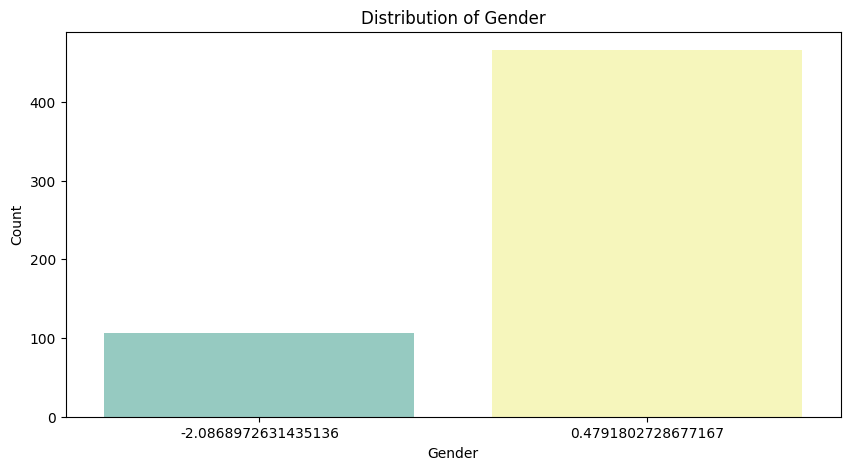

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=loan_data, palette='Set3')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 1000x500 with 0 Axes>

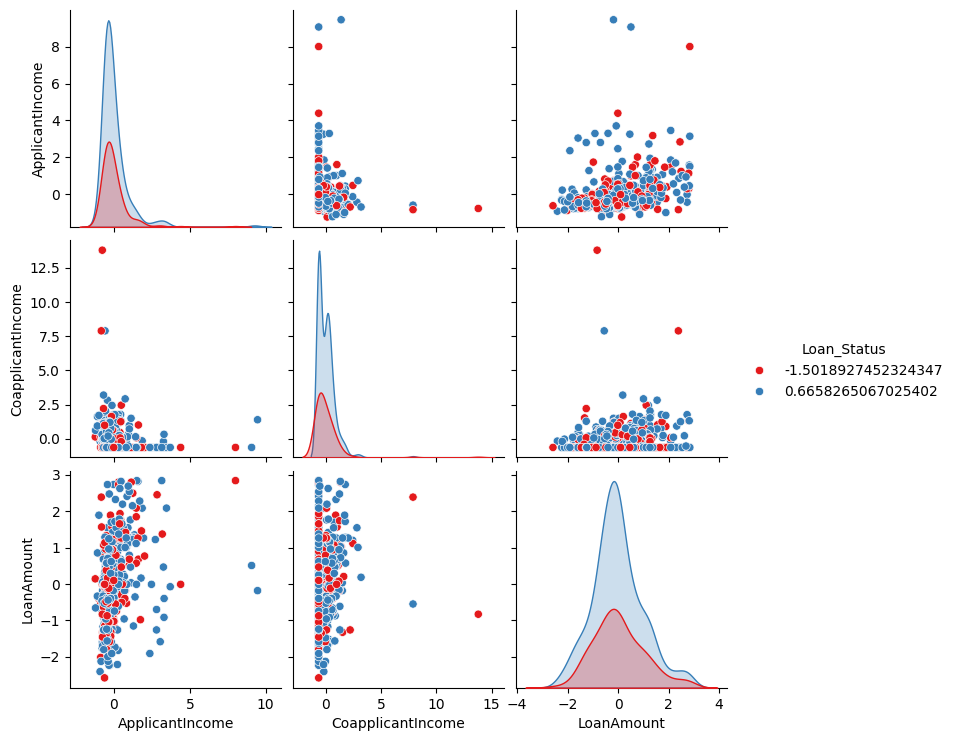

In [46]:
plt.figure(figsize=(10, 5))
sns.pairplot(loan_data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status', palette='Set1')
plt.show()

<ipython-input-49-9ce882f481a6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='LoanAmount', data=loan_data, palette='Set2')


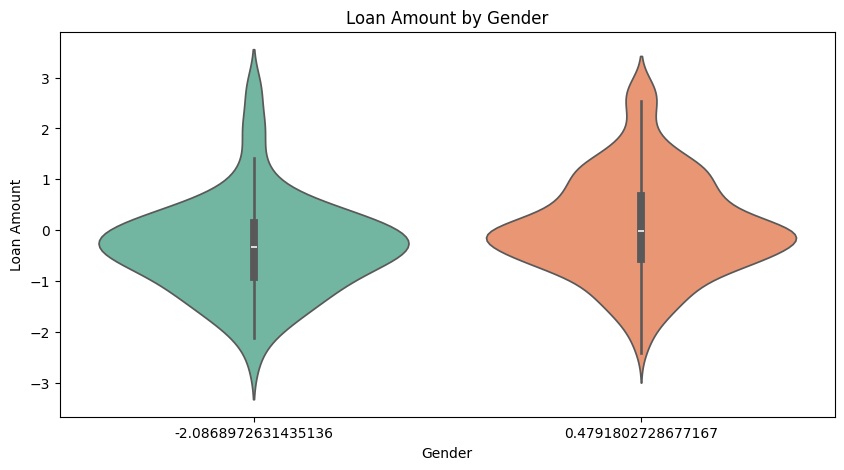

In [49]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Gender', y='LoanAmount', data=loan_data, palette='Set2')
plt.title('Loan Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

<Figure size 1200x800 with 0 Axes>

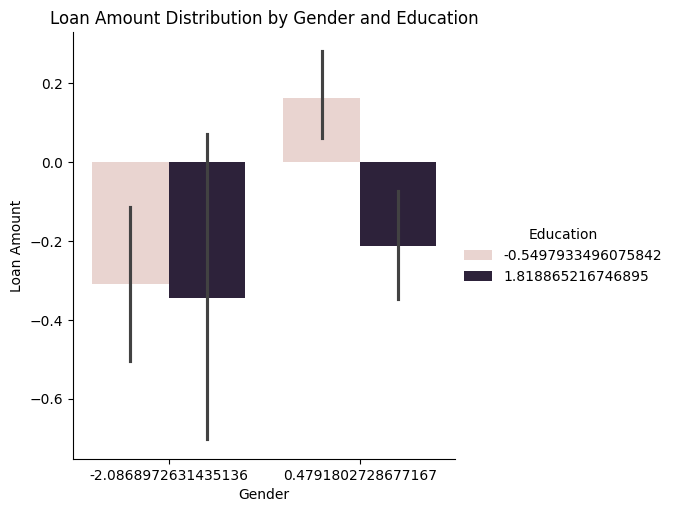

In [50]:
# Create a factor plot
plt.figure(figsize=(12, 8))
sns.catplot(x='Gender', y='LoanAmount', hue='Education', kind='bar', data=loan_data)
plt.title('Loan Amount Distribution by Gender and Education')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

<Figure size 1200x800 with 0 Axes>

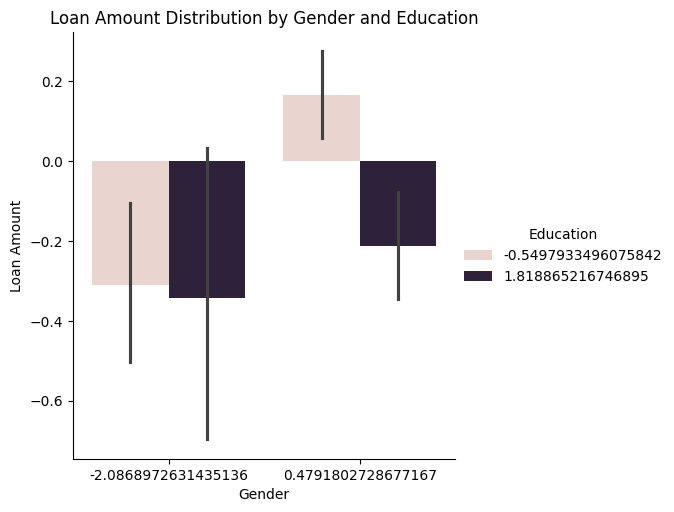

In [51]:
# Create a catplot
plt.figure(figsize=(12, 8))
sns.catplot(x='Gender', y='LoanAmount', hue='Education', kind='bar', data=loan_data)
plt.title('Loan Amount Distribution by Gender and Education')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.show()

<ipython-input-52-ac9310553e11>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  catplot = sns.catplot(x='Gender', y='LoanAmount', hue='Education', kind='bar', data=loan_data, palette=palette, height=6)


<Figure size 1200x800 with 0 Axes>

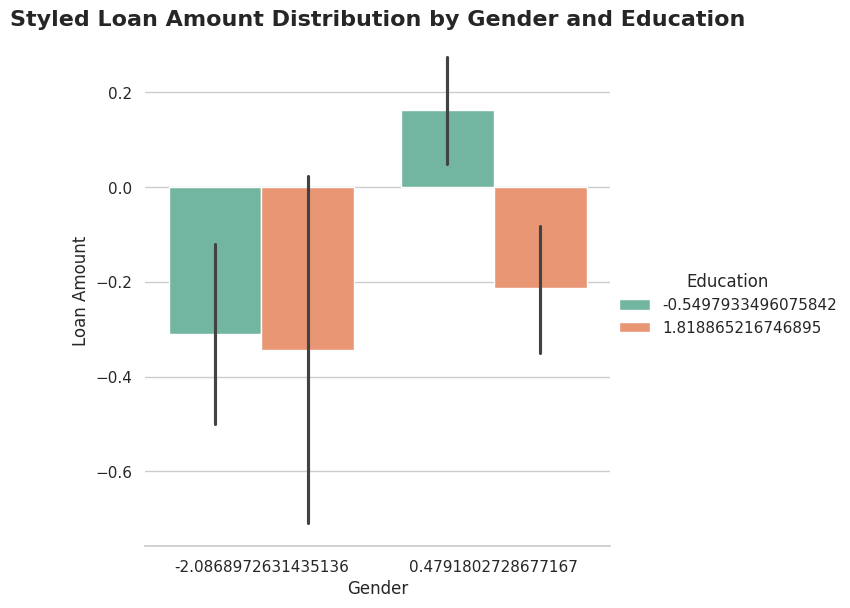

In [52]:
# Set the style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Create a styled catplot
plt.figure(figsize=(12, 8))
catplot = sns.catplot(x='Gender', y='LoanAmount', hue='Education', kind='bar', data=loan_data, palette=palette, height=6)
catplot.set_axis_labels("Gender", "Loan Amount")
catplot.set_titles("Loan Amount Distribution by Gender and Education")
catplot.despine(left=True)

# Customize the plot's title
plt.title('Styled Loan Amount Distribution by Gender and Education', fontsize=16, weight='bold')
plt.show()

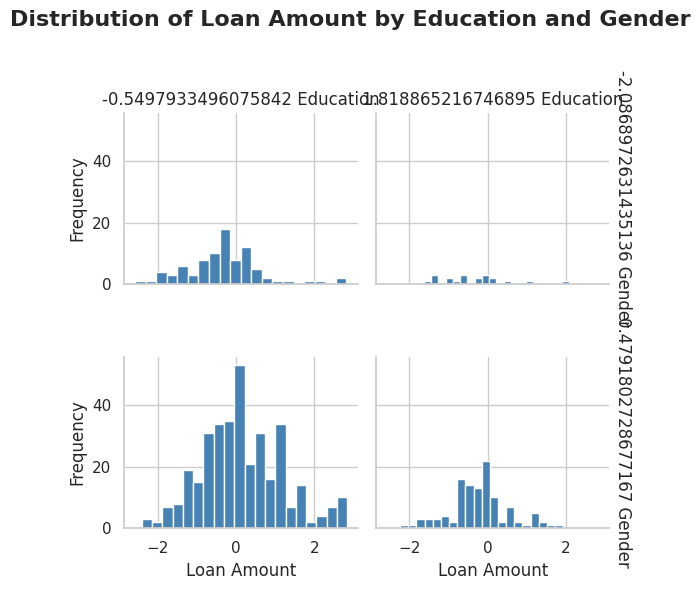

In [53]:

# Set the style for the plots
sns.set(style="whitegrid")

# Create a FacetGrid for LoanAmount by Education and Gender
g = sns.FacetGrid(loan_data, col="Education", row="Gender", margin_titles=True)
g.map(plt.hist, "LoanAmount", bins=20, color="steelblue")

# Add titles and labels
g.fig.suptitle('Distribution of Loan Amount by Education and Gender', fontsize=16, weight='bold')
g.set_axis_labels("Loan Amount", "Frequency")
g.set_titles(col_template="{col_name} Education", row_template="{row_name} Gender")

# Adjust the layout
g.fig.tight_layout(rect=[0, 0, 1, 0.95])